# Evaluation of Model Results
## Model M025

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import os
import pprint
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

test = pd.read_csv('../input/test.csv')

In [2]:
tracking = pd.read_csv('../tracking/tracking.csv')
BEST_PUBLIC_RUN_ID = tracking.loc[tracking['lb_score'] == tracking['lb_score'].min()]['run_id'].values[0]
BEST_PUBLIC_SCORE = tracking.loc[tracking['lb_score'] == tracking['lb_score'].min()]['lb_score'].values[0]
print('------------------------------------------------------')
print('Currently the best public LB score is model {} with a score of {:.4f}'.format(BEST_PUBLIC_RUN_ID,
                                                                                     BEST_PUBLIC_SCORE))
print('------------------------------------------------------')
tracking

------------------------------------------------------
Currently the best public LB score is model 0627_1434 with a score of -1.3820
------------------------------------------------------


,run_id,model_number,eval_metric,n_estimators,early_stopping_rounds,random_state,n_threads,learning_rate,n_fold,training_time,n_features,gml_oof_score,oof_score,lb_score,1JHC_mae_cv,2JHH_mae_cv,1JHN_mae_cv,2JHN_mae_cv,2JHC_mae_cv,3JHH_mae_cv,3JHC_mae_cv,3JHN_mae_cv,1JHC_std_mae_cv,2JHH_std_mae_cv,1JHN_std_mae_cv,2JHN_std_mae_cv,2JHC_std_mae_cv,3JHH_std_mae_cv,3JHC_std_mae_cv,3JHN_std_mae_cv,model_type,1JHC_tr_sec_f1,1JHC_pred_sec_f1,1JHC_tr_sec_f2,1JHC_pred_sec_f2,2JHH_tr_sec_f1,2JHH_pred_sec_f1,2JHH_tr_sec_f2,2JHH_pred_sec_f2,1JHN_tr_sec_f1,1JHN_pred_sec_f1,1JHN_tr_sec_f2,1JHN_pred_sec_f2,2JHN_tr_sec_f1,2JHN_pred_sec_f1,2JHN_tr_sec_f2,2JHN_pred_sec_f2,2JHC_tr_sec_f1,2JHC_pred_sec_f1,2JHC_tr_sec_f2,2JHC_pred_sec_f2,3JHH_tr_sec_f1,3JHH_pred_sec_f1,3JHH_tr_sec_f2,3JHH_pred_sec_f2,3JHC_tr_sec_f1,3JHC_pred_sec_f1,3JHC_tr_sec_f2,3JHC_pred_sec_f2,3JHN_tr_sec_f1,3JHN_pred_sec_f1,3JHN_tr_sec_f2,3JHN_pred_sec_f2,1JHC_csv_save_sec,2JHH_csv_save_sec,1JHN_csv_save_sec,2JHN_csv_save_sec,2JHC_csv_save_sec,3JHH_csv_save_sec,3JHC_csv_save_sec
0,0610_1341,M010,mae,500000.0,500.0,529.0,32.0,0.5,5.0,NaN,61.0,NaN,0.9210,-0.452,1.9206,0.4542,1.0336,0.5335,0.8405,0.5699,0.8593,0.3264,0.003880,0.001120,0.009450,0.003940,0.001310,0.001490,0.002790,0.001840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0611_0308,M012,mae,500000.0,500.0,529.0,32.0,0.5,5.0,NaN,28.0,NaN,1.0109,-0.202,1.8632,0.4782,0.9773,0.5826,1.0352,0.6167,0.9867,0.3553,0.004150,0.000600,0.015240,0.003990,0.004350,0.002850,0.001620,0.000880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0611_1250,M013,mae,50000.0,500.0,529.0,32.0,0.5,5.0,137353.19,28.0,NaN,0.9488,NaN,1.7478,0.4442,1.0337,0.5300,0.9603,0.5761,0.9359,0.3300,0.004850,0.002930,0.018920,0.002640,0.003300,0.001670,0.001820,0.002020,catboost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0611_1249,M014,mae,500000.0,500.0,529.0,24.0,0.3,5.0,NaN,28.0,NaN,0.9142,-0.275,1.7005,0.4378,0.8751,0.5070,0.9209,0.5596,0.8967,0.3167,0.004320,0.001560,0.010190,0.005360,0.002920,0.002430,0.001970,0.001910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0613_0402,M015,mae,500000.0,500.0,529.0,24.0,0.3,5.0,NaN,51.0,NaN,0.7914,-0.671,1.6918,0.3843,0.9161,0.4388,0.7155,0.4726,0.7331,0.2789,0.002150,0.001680,0.005870,0.004250,0.002300,0.001940,0.000830,0.000630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0618_0349,M016,group_mae,500000.0,500.0,529.0,42.0,0.2,5.0,NaN,51.0,NaN,0.7409,-0.695,1.5980,0.3582,0.8608,0.4013,0.6672,0.4389,0.6844,0.2577,0.000870,0.001880,0.006770,0.003120,0.000600,0.001030,0.000430,0.001880,lgbm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0621_0331,M017,group_mae,500000.0,500.0,529.0,42.0,0.1,3.0,NaN,50.0,NaN,NaN,1.821,1.4084,0.3370,0.6011,0.3923,0.6379,0.3653,0.6537,0.2566,0.001000,0.001400,0.003790,0.000700,0.000000,0.000000,0.000000,0.000000,lgbm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21579.49,30164.40,30540.03,31977.75,NaN,NaN,NaN
7,0623_1352,M018,group_mae,5000.0,500.0,529.0,52.0,0.1,2.0,1872.92,50.0,1.6174,12.0448,-0.634,1.5620,0.3581,0.5850,0.3863,0.7560,0.4070,0.8174,0.2618,0.001530,0.000020,0.001840,0.000520,0.000840,0.001220,0.002630,0.001030,lgbm,83.13,21.90,83.55,21.61,57.86,11.18,56.75,10.66,23.05,0.99,23.29,0.89,35.55,3.35,36.49,3.18,130.31,37.0

In [4]:
RUN_ID = '0629_1311'
MODEL_NO = 'M025'
sub_file = [x for x in os.listdir('../submissions/') if RUN_ID in x][0]
#fi_file = [x for x in os.listdir('../fi/') if RUN_ID in x][0]
oof_file = [x for x in os.listdir('../oof') if RUN_ID in x][0]
# Read in files for new RUN_ID
sub = pd.read_csv(f'../submissions/{sub_file}')
oof = pd.read_csv(f'../oof/{oof_file}')
#fi = pd.read_csv(f'../fi/{fi_file}')
# Read in files for best RUN_ID
bsub_file = [x for x in os.listdir('../submissions/') if BEST_PUBLIC_RUN_ID in x][0]
bfi_file = [x for x in os.listdir('../fi/') if BEST_PUBLIC_RUN_ID in x][0]
boof_file = [x for x in os.listdir('../oof') if BEST_PUBLIC_RUN_ID in x][0]
bsub = pd.read_csv(f'../submissions/{bsub_file}')
boof = pd.read_csv(f'../oof/{boof_file}')
bfi = pd.read_csv(f'../fi/{bfi_file}')

## Features with no importance

In [5]:
# fi_mean = fi.groupby('feature').mean()
# no_importance_features = fi_mean.loc[fi_mean['importance'] == 0].index.tolist()
# print('Features with no importance at all')
# pprint.pprint(no_importance_features)

## Feature with no importance by type

In [6]:
# fi_minus_non_imp = fi.loc[~fi['feature'].isin(no_importance_features)]
# for i, d in fi_minus_non_imp.groupby('type'):
#     d_mean = d.groupby('feature').mean()
#     d_mean.loc[d_mean['importance'] == 0]
#     print(d_mean.loc[d_mean['importance'] == 0].index)

In [7]:
# for i, d in fi_minus_non_imp.groupby('type'):
#     plt.figure(figsize=(16, 30));
#     sns.barplot(x="importance", y="feature", data=d.sort_values(by="importance", ascending=False));
#     plt.title('{} - LGB Features (avg over folds)'.format(i))
#     plt.show()

# Compare Submission Files

In [8]:
sub['type'] = test['type']
bsub['type'] = test['type']

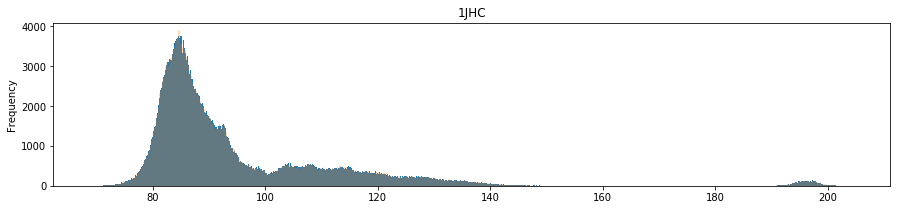

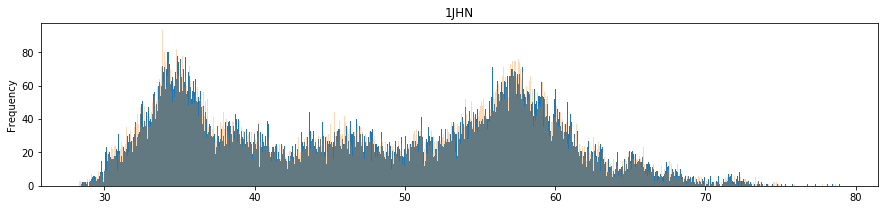

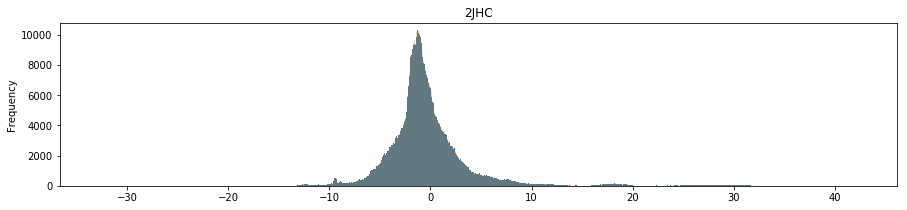

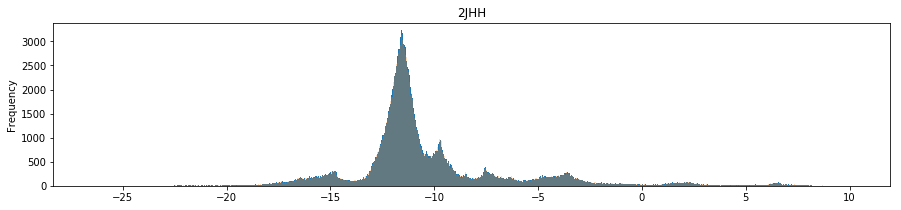

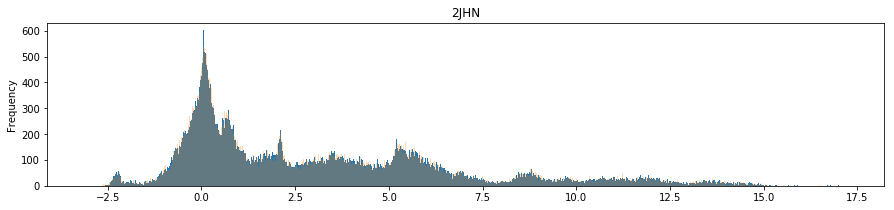

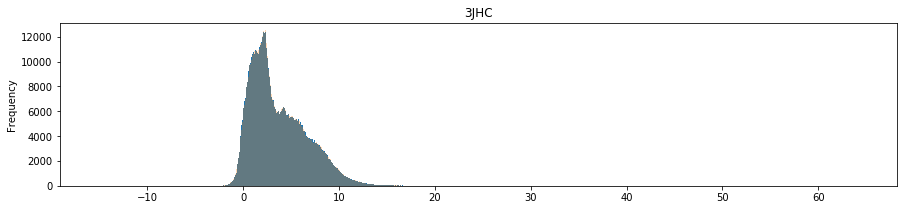

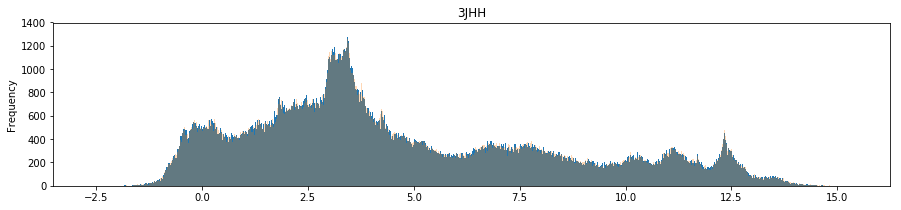

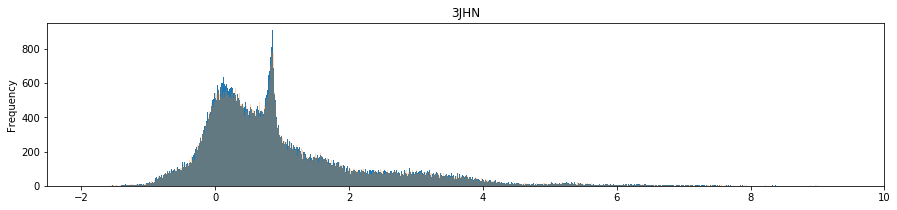

In [9]:
for i, d in sub.groupby('type'):
    d['scalar_coupling_constant'].plot(kind='hist', figsize=(15, 3), title=i, bins=1000)
    # also plot best sub
    d_bsub = bsub.loc[bsub['type'] == i]
    d_bsub['scalar_coupling_constant'].plot(kind='hist', figsize=(15, 3), title=i, bins=1000, alpha=0.3)
    plt.show()

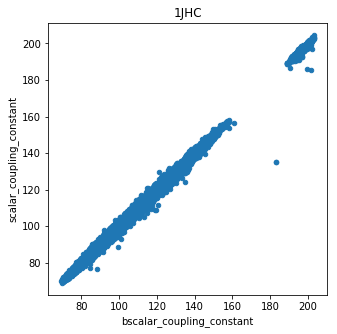

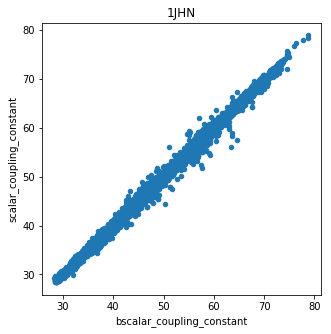

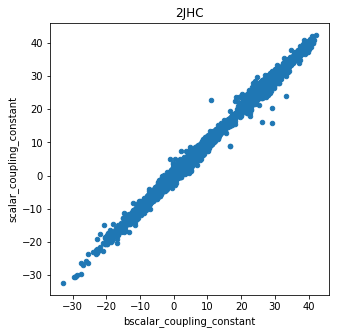

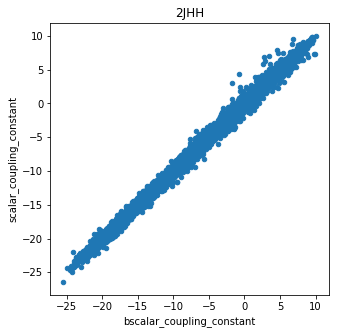

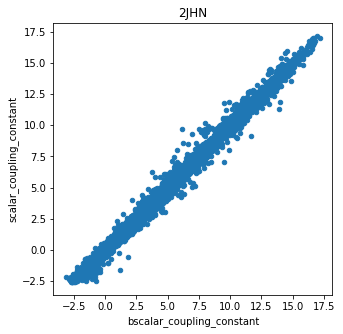

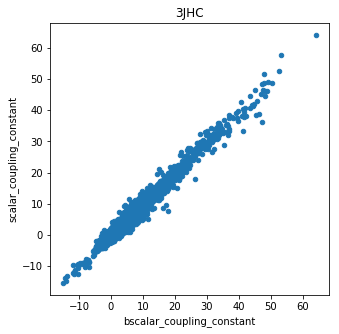

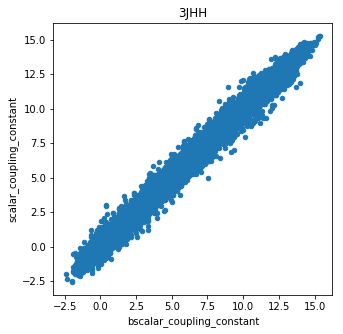

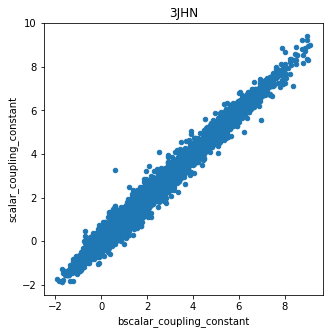

In [10]:
sub['bscalar_coupling_constant'] = bsub['scalar_coupling_constant']
# Scatter plot of submission
for i, d in sub.groupby('type'):
    d.plot(x='bscalar_coupling_constant', y='scalar_coupling_constant', kind='scatter', figsize=(5, 5), title=i)

# Compare OOF

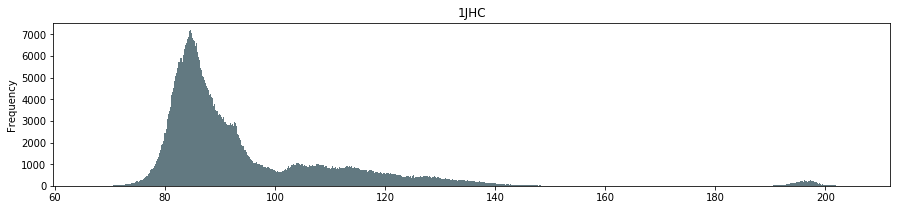

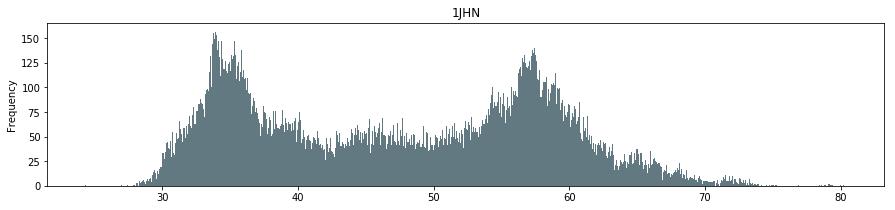

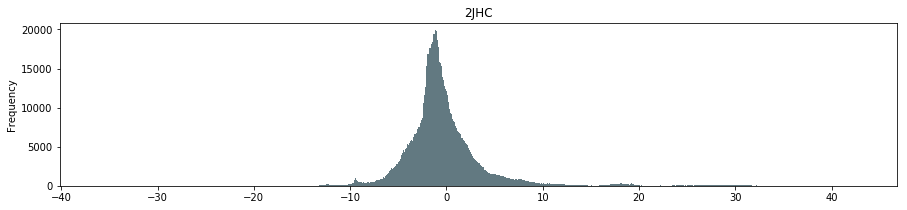

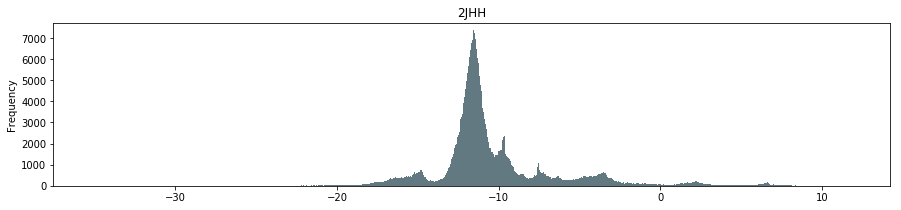

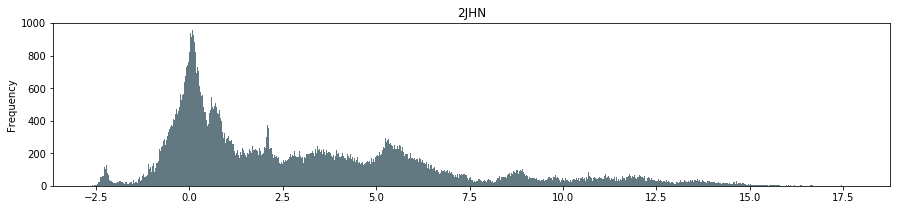

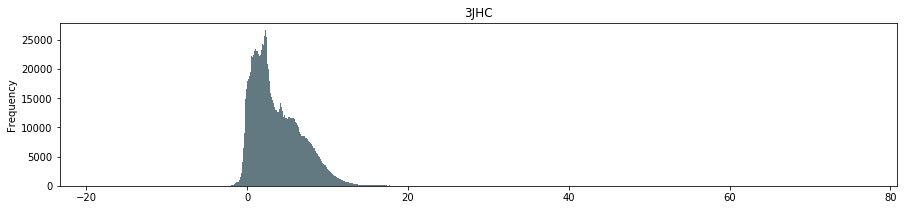

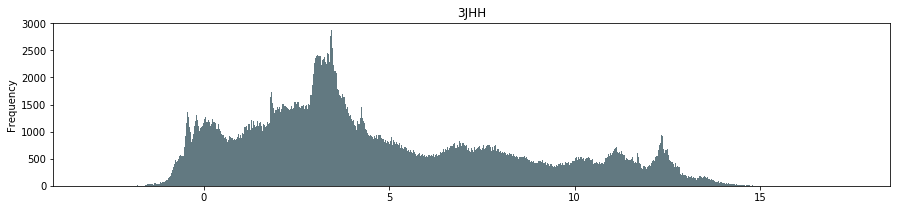

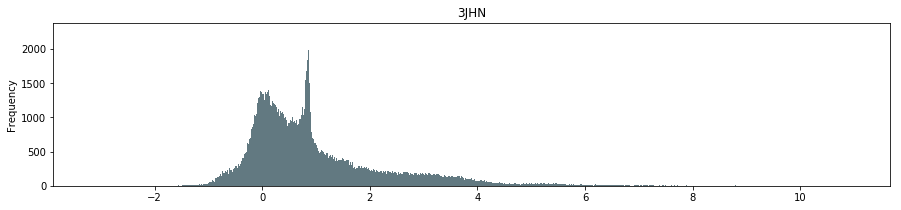

In [11]:
for i, d in oof.groupby('type'):
    d['scalar_coupling_constant'].plot(kind='hist', figsize=(15, 3), title=i, bins=1000)
    # also plot best sub
    d_boof = boof.loc[boof['type'] == i]
    d_boof['scalar_coupling_constant'].plot(kind='hist', figsize=(15, 3), title=i, bins=1000, alpha=0.3)
    plt.show()

# Update Leaderboard score

In [12]:
LB_SCORE = -1.415
tracking = pd.read_csv('../tracking/tracking.csv')
tracking.loc[tracking['run_id'] == RUN_ID, 'lb_score'] = LB_SCORE
tracking.to_csv('../tracking/tracking.csv', index=False)